In [1]:
from keras import layers
from keras.models import Sequential
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) o

In [5]:
from conv_classifier import DtcwtConvClassifier

clsf = DtcwtConvClassifier()

In [4]:
clsf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 123, 20)           1620      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 121, 20)           1220      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 119, 20)           1220      
_________________________________________________________________
global_average_pooling1d_1 ( (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 4,270
Trainable params: 4,270
Non-trainable params: 0
_________________________________________________________________


In [6]:
print('Loading data')
(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train = list(y_train)
for counter, y in enumerate(y_train):
    y_train[counter] = [0 if i!=y else 1 for i in range(10)]
y_train = np.array(y_train)

Loading data


In [7]:
history = clsf.fit(X_train[0:2000], y_train[0:2000])

0/2000
25/2000
50/2000
75/2000
100/2000
125/2000
150/2000
175/2000
200/2000
225/2000
250/2000
275/2000
300/2000
325/2000
350/2000
375/2000
400/2000
425/2000
450/2000
475/2000
500/2000
525/2000
550/2000
575/2000
600/2000
625/2000
650/2000
675/2000
700/2000
725/2000
750/2000
775/2000
800/2000
825/2000
850/2000
875/2000
900/2000
925/2000
950/2000
975/2000
1000/2000
1025/2000
1050/2000
1075/2000
1100/2000
1125/2000
1150/2000
1175/2000
1200/2000
1225/2000
1250/2000
1275/2000
1300/2000
1325/2000
1350/2000
1375/2000
1400/2000
1425/2000
1450/2000
1475/2000
1500/2000
1525/2000
1550/2000
1575/2000
1600/2000
1625/2000
1650/2000
1675/2000
1700/2000
1725/2000
1750/2000
1775/2000
1800/2000
1825/2000
1850/2000
1875/2000
1900/2000
1925/2000
1950/2000
1975/2000
Mean computing time :  0.2703087326288223
Total computing time :  540.6174652576447
SCATX SHAPE : (2000, 127, 16)
Train on 1600 samples, validate on 400 samples
Epoch 1/100
1600/1600 [==============================] - 0s 271us/step - loss: 0.727

1600/1600 [==============================] - 0s 186us/step - loss: 0.1190 - accuracy: 0.9567 - val_loss: 0.1059 - val_accuracy: 0.9623
Epoch 51/100
1600/1600 [==============================] - 0s 184us/step - loss: 0.1174 - accuracy: 0.9566 - val_loss: 0.1041 - val_accuracy: 0.9640
Epoch 52/100
1600/1600 [==============================] - 0s 166us/step - loss: 0.1174 - accuracy: 0.9579 - val_loss: 0.1072 - val_accuracy: 0.9582
Epoch 53/100
1600/1600 [==============================] - 0s 162us/step - loss: 0.1185 - accuracy: 0.9558 - val_loss: 0.1009 - val_accuracy: 0.9660
Epoch 54/100
1600/1600 [==============================] - 0s 158us/step - loss: 0.1146 - accuracy: 0.9586 - val_loss: 0.1009 - val_accuracy: 0.9628
Epoch 55/100
1600/1600 [==============================] - 0s 178us/step - loss: 0.1119 - accuracy: 0.9597 - val_loss: 0.1098 - val_accuracy: 0.9603
Epoch 56/100
1600/1600 [==============================] - 0s 167us/step - loss: 0.1140 - accuracy: 0.9574 - val_loss: 0.1080 

In [11]:
history_dict = history.history

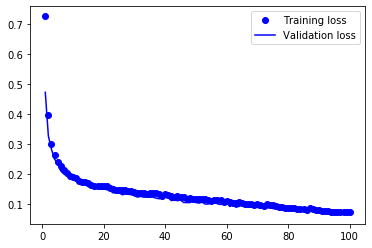

In [12]:
%matplotlib inline
%matplotlib inline

epochs = range(1,101)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.legend()
plt.show()

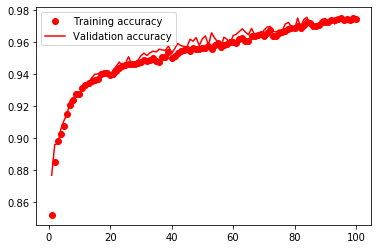

In [13]:
plt.plot(epochs, history_dict['accuracy'], 'ro', label='Training accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation accuracy')
plt.legend()
plt.savefig('accuracy_randomini_classification.png')
plt.show()